In [1]:
# Dependencies
import pandas as pd

In [2]:
file = 'Dropouts2019-2020_cleaned.csv'

In [3]:
#read in the csv
old_df = pd.read_csv(file)
old_df.head()

,County,AUN,LEA,School Code,School,Oct 1 Enrollment Grades 7-12,Male Dropouts,Female Dropouts,Dropouts,Dropout Rate
0,Adams,112011103.0,Bermudian Springs SD,3.0,Bermudian Springs HS,597,2,3,5,0.84%
1,Adams,112011103.0,Bermudian Springs SD,6921.0,Bermudian Springs MS,323,0,0,0,0.00%
2,Adams,112011603.0,Conewago Valley SD,9999.0,Conewago Valley SD,12,1,0,1,8.33%
3,Adams,112011603.0,Conewago Valley SD,6898.0,New Oxford MS,634,0,0,0,0.00%
4,Adams,112011603.0,Conewago Valley SD,17.0,New Oxford SHS,"1,227",13,10,23,1.87%


In [4]:
#select only data that shows dropouts in total and as a rate
clean_df = old_df[['County','Dropouts','Dropout Rate']].copy()
clean_df.head(20)
# clean_df.dtypes

,County,Dropouts,Dropout Rate
0,Adams,5,0.84%
1,Adams,0,0.00%
2,Adams,1,8.33%
3,Adams,0,0.00%
4,Adams,23,1.87%
5,Adams,3,0.93%
6,Adams,0,0.00%
7,Adams,0,0.00%
8,Adams,8,0.70%
9,Adams,0,0.00%


In [5]:
#replace percent sign from dropout rate with nothing
clean_df['Dropout Rate'] = clean_df['Dropout Rate'].str.replace('%','')
clean_df.head()

,County,Dropouts,Dropout Rate
0,Adams,5,0.84
1,Adams,0,0.00
2,Adams,1,8.33
3,Adams,0,0.00
4,Adams,23,1.87


In [6]:
#since dropout rate and dropout values are given as strings, convert to floats
#note number of rows
clean_df['Dropout Rate'] = clean_df['Dropout Rate'].astype(float)
clean_df
clean_df['Dropouts']=clean_df['Dropouts'].str.replace(',','')
clean_df['Dropouts'] = clean_df['Dropouts'].astype(float)
clean_df

,County,Dropouts,Dropout Rate
0,Adams,5.0,0.84
1,Adams,0.0,0.00
2,Adams,1.0,8.33
3,Adams,0.0,0.00
4,Adams,23.0,1.87
...,...,...,...
1726,York,3.0,15.79
1727,York,8.0,0.80
1728,Overall,11665.0,1.44
1729,"Apr 7, 2021\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t8:5...",NaN,NaN


In [7]:
#drop the Apr 7th cell (row 1729) that shows null values
#note number of rows
clean_df = clean_df.dropna(inplace=False)
clean_df

,County,Dropouts,Dropout Rate
0,Adams,5.0,0.84
1,Adams,0.0,0.00
2,Adams,1.0,8.33
3,Adams,0.0,0.00
4,Adams,23.0,1.87
...,...,...,...
1724,York,8.0,0.47
1725,York,0.0,0.00
1726,York,3.0,15.79
1727,York,8.0,0.80


In [8]:
#list all of the same county data together
sum_df = clean_df.groupby(['County'])['Dropouts'].sum()
sum_df.head(10)
avg_df = clean_df.groupby(['County'])['Dropout Rate'].mean()
avg_df.head(10)

County
Adams        0.833333
Allegheny    1.304518
Armstrong    3.490769
Beaver       1.258108
Bedford      0.419167
Berks        1.410351
Blair        2.122632
Bradford     0.587778
Bucks        0.916316
Butler       1.725556
Name: Dropout Rate, dtype: float64

In [128]:
#since different functions were applied to the columns two dataframes were created and merged
new_df = pd.merge(left=sum_df, right=avg_df, how='left', left_on='County', right_on='County')
new_df.head(60)

,Dropouts,Dropout Rate
County,,
Adams,52.0,0.833333
Allegheny,514.0,1.304518
Armstrong,28.0,3.490769
Beaver,655.0,1.258108
Bedford,21.0,0.419167
Berks,508.0,1.410351
Blair,90.0,2.122632
Bradford,30.0,0.587778
Bucks,175.0,0.916316


In [157]:
#note number of rows
#create a temporary copy so as to safeguard future manipulation of data from being overwritten 
temp_df = new_df.copy()
# temp_df.head(60)
temp_df.reset_index(inplace = True)
temp_df.head(60)

,County,Dropouts,Dropout Rate
0,Adams,52.0,0.833333
1,Allegheny,514.0,1.304518
2,Armstrong,28.0,3.490769
3,Beaver,655.0,1.258108
4,Bedford,21.0,0.419167
5,Berks,508.0,1.410351
6,Blair,90.0,2.122632
7,Bradford,30.0,0.587778
8,Bucks,175.0,0.916316
9,Butler,85.0,1.725556


In [158]:
a = temp_df.iloc[49]
a

County          Overall
Dropouts        11665.0
Dropout Rate       1.44
Name: 49, dtype: object

In [183]:
visual_df = temp_df.drop([49])
visual_df.head(60)
visual_df.reset_index(inplace = True)

In [192]:
#visual_df.drop(columns = 'index')
visual_df.head(60)

,County,Dropouts,Dropout Rate
0,Adams,52.0,0.833333
1,Allegheny,514.0,1.304518
2,Armstrong,28.0,3.490769
3,Beaver,655.0,1.258108
4,Bedford,21.0,0.419167
5,Berks,508.0,1.410351
6,Blair,90.0,2.122632
7,Bradford,30.0,0.587778
8,Bucks,175.0,0.916316
9,Butler,85.0,1.725556


In [162]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [193]:
label = visual_df['County']
label

0            Adams
1        Allegheny
2        Armstrong
3           Beaver
4          Bedford
          ...     
62      Washington
63           Wayne
64    Westmoreland
65         Wyoming
66            York
Name: County, Length: 67, dtype: object

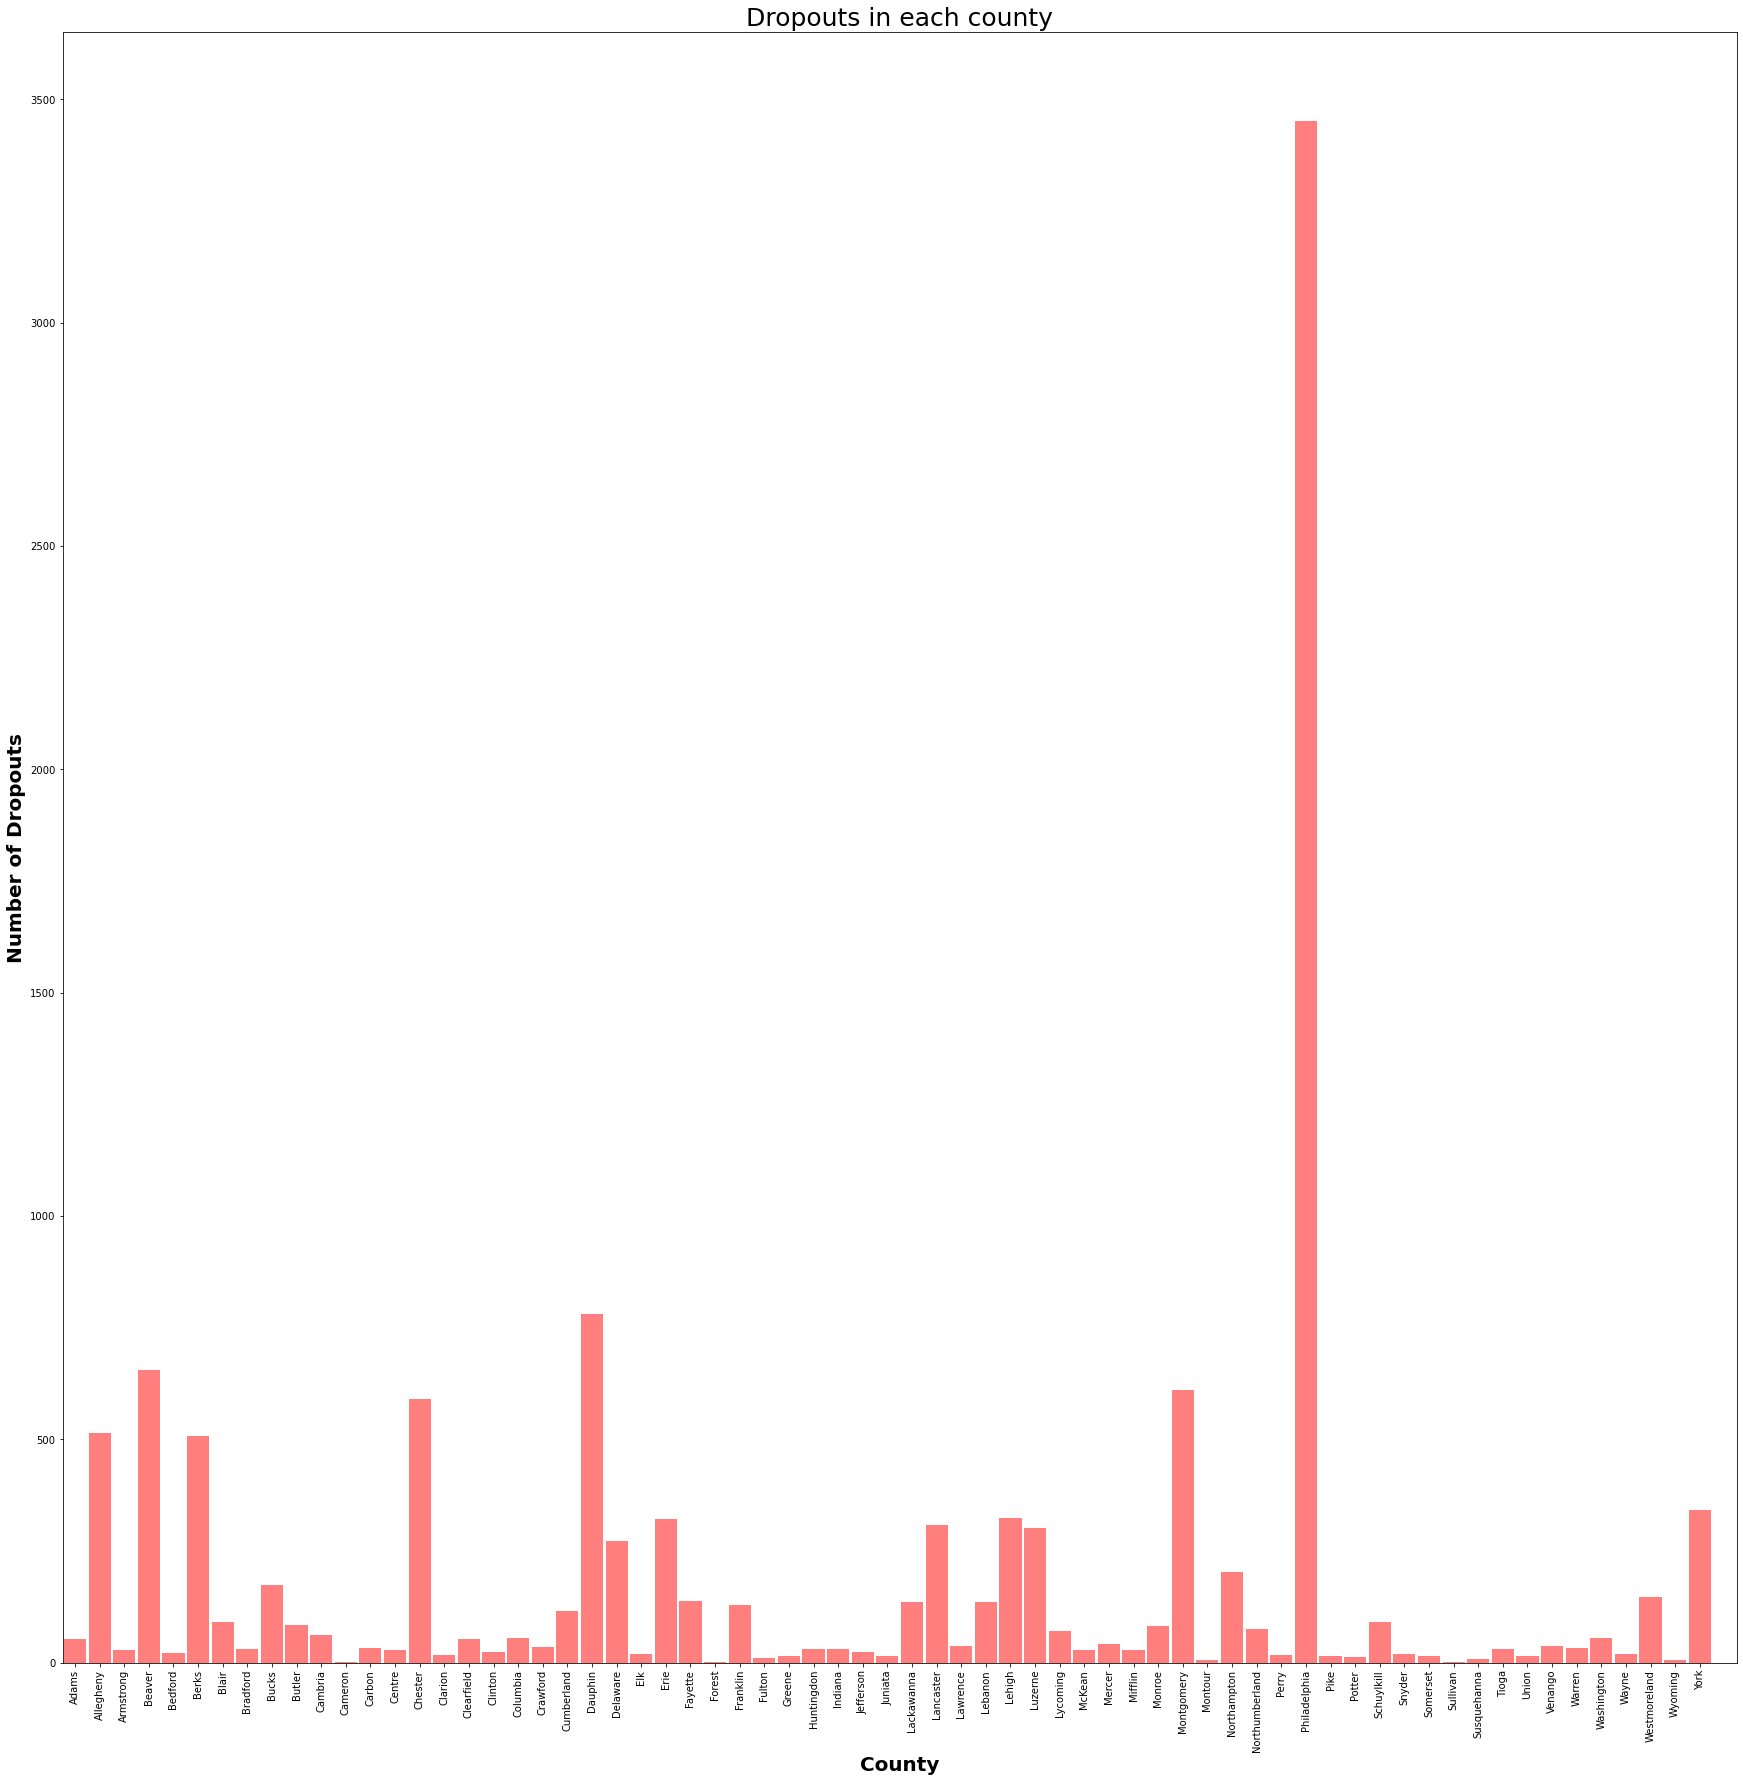

In [194]:
#as a baseline, show a scatterplot of number of dropouts per county
y = visual_df['Dropouts']
x = np.arange(len(visual_df['County']))

#large figsize to show the smaller number
fig, ax = plt.subplots(figsize =(30, 30))
plt.bar(x, y, color='r', width=0.9, alpha=0.5)
plt.xlim(-0.5, len(x)+0.5)
plt.ylim(0, max(y)+200)

plt.title("Dropouts in each county", fontsize = 25)
plt.xlabel('County', fontweight ='bold', fontsize = 20)
plt.ylabel('Number of Dropouts', fontweight ='bold', fontsize = 20)
plt.xticks(ticks = np.arange(67) , labels = label, rotation=90)
plt.savefig("Visualizations/dropouts_counties.png")

In [195]:
x = visual_df['County']
y = visual_df['Dropouts']

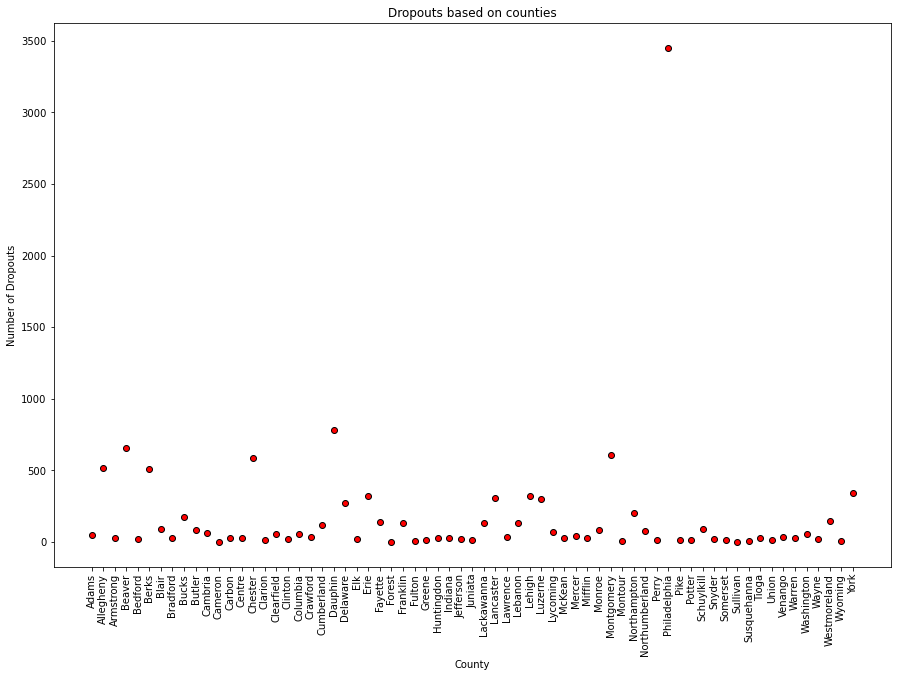

In [200]:
#plot a scatter of the number of dropouts per county
plt.figure(figsize=(15, 10))
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")

plt.title("Dropouts based on counties")
plt.xlabel("County")
plt.ylabel("Number of Dropouts")
plt.xticks(ticks = np.arange(67) , labels = label, rotation=90)
plt.savefig("Visualizations/dropouts_counties_scatter.png")

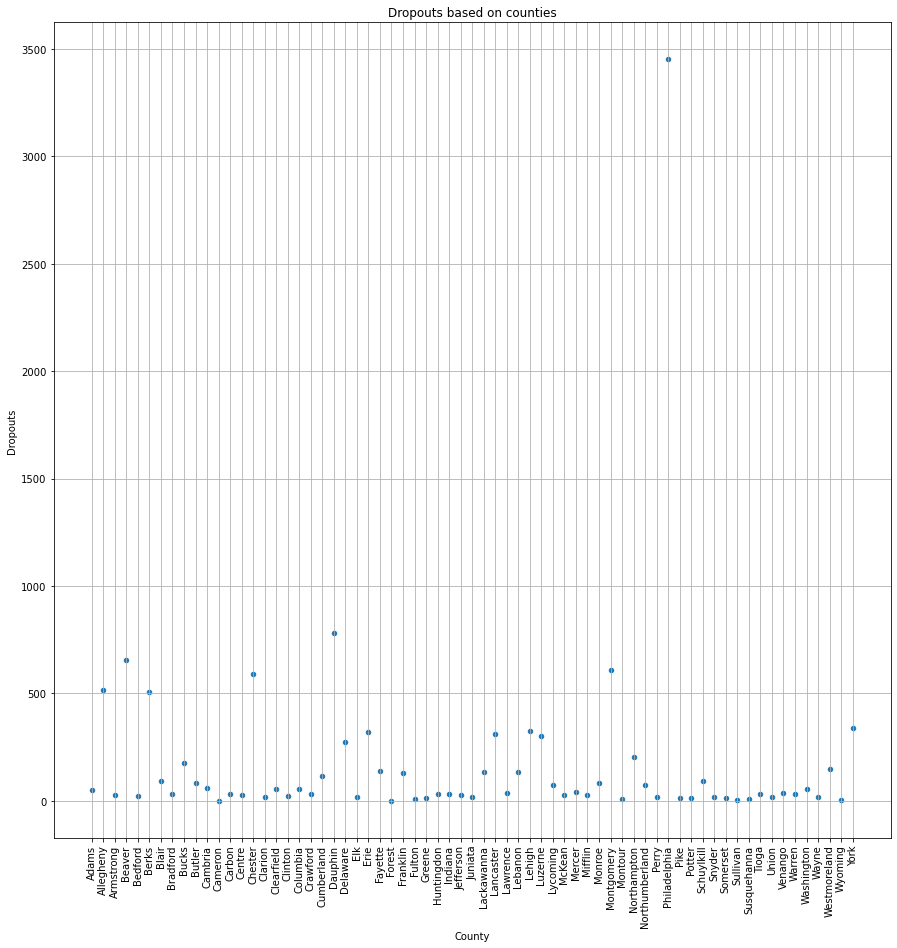

<Figure size 432x288 with 0 Axes>

In [241]:
#alternate view of the same plot
# visual_df.plot(kind="scatter", x="County", y="Dropouts", grid=True, figsize=(15,15), rot = 90,
#               title="Dropouts based on counties")
# plt.show()
# plt.savefig("Visualizations/dropouts_counties_scatter1.png")

# What is the relationship between alcohol sales and high school dropout rates per county?

In [173]:
#reading in the sales data csv
file = '../Data Sources/compiled_sales_2018_to_2020.csv'
read_sales_df = pd.read_csv(file)

read_sales_df.head()

,County,2017-2018 Year Total ($),2018-2019 Year Total ($),2019-2020 Year Total ($)
0,Adams,5974649.0,6087119.0,5474672.0
1,Allegheny,287446445.0,297562217.0,282457996.0
2,Armstrong,4119789.0,4100004.0,3946644.0
3,Beaver,20662151.0,21929547.0,21044165.0
4,Bedford,3794119.0,3777616.0,3624763.0


In [174]:
#select data for the 2019-2020 year
sales_2019_df = read_sales_df[['County','2019-2020 Year Total ($)']]
sales_2019_df

,County,2019-2020 Year Total ($)
0,Adams,5474672.0
1,Allegheny,282457996.0
2,Armstrong,3946644.0
3,Beaver,21044165.0
4,Bedford,3624763.0
...,...,...
62,Washington,26798762.0
63,Wayne,12246352.0
64,Westmoreland,60414024.0
65,Wyoming,3026001.0


In [213]:
#Note: sales data starts in July of 2019 and ends in June of 2020 (12 months), create an average column

#sales_2019_df.insert(2, "Average ($)", " ", True )
sales_2019_df

,County,2019-2020 Year Total ($),Average ($)
0,Adams,5474672.0,
1,Allegheny,282457996.0,
2,Armstrong,3946644.0,
3,Beaver,21044165.0,
4,Bedford,3624763.0,
...,...,...,...
62,Washington,26798762.0,
63,Wayne,12246352.0,
64,Westmoreland,60414024.0,
65,Wyoming,3026001.0,


In [214]:
# since filtering the sales data based on months is not possible (limitation), 
# matching the time frame of sales data (12 months) with dropout data (8 months)
Average = ((sales_2019_df['2019-2020 Year Total ($)'])/12)*8
Average

0     3.649781e+06
1     1.883053e+08
2     2.631096e+06
3     1.402944e+07
4     2.416509e+06
          ...     
62    1.786584e+07
63    8.164235e+06
64    4.027602e+07
65    2.017334e+06
66    3.731000e+07
Name: 2019-2020 Year Total ($), Length: 67, dtype: float64

In [215]:
# entering the average data above into the dataframe
sales_2019_df['Average ($)'] = Average
sales_2019_df

C:\Users\nallu\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,County,2019-2020 Year Total ($),Average ($)
0,Adams,5474672.0,3.649781e+06
1,Allegheny,282457996.0,1.883053e+08
2,Armstrong,3946644.0,2.631096e+06
3,Beaver,21044165.0,1.402944e+07
4,Bedford,3624763.0,2.416509e+06
...,...,...,...
62,Washington,26798762.0,1.786584e+07
63,Wayne,12246352.0,8.164235e+06
64,Westmoreland,60414024.0,4.027602e+07
65,Wyoming,3026001.0,2.017334e+06


In [178]:
# bringing both the data sets into one dataframe
combined_df = pd.merge(left=sales_2019_df, right=visual_df, how='left', left_on='County', right_on='County')
combined_df

,County,2019-2020 Year Total ($),Average ($),Dropouts,Dropout Rate
0,Adams,5474672.0,3.649781e+06,52.0,0.833333
1,Allegheny,282457996.0,1.883053e+08,514.0,1.304518
2,Armstrong,3946644.0,2.631096e+06,28.0,3.490769
3,Beaver,21044165.0,1.402944e+07,655.0,1.258108
4,Bedford,3624763.0,2.416509e+06,21.0,0.419167
...,...,...,...,...,...
62,Washington,26798762.0,1.786584e+07,55.0,0.648286
63,Wayne,12246352.0,8.164235e+06,20.0,0.418750
64,Westmoreland,60414024.0,4.027602e+07,147.0,1.127115
65,Wyoming,3026001.0,2.017334e+06,5.0,0.187500


In [24]:
#compare sales and rate

In [217]:
from scipy.stats import linregress

The r-squared is: 0.028374550970866098


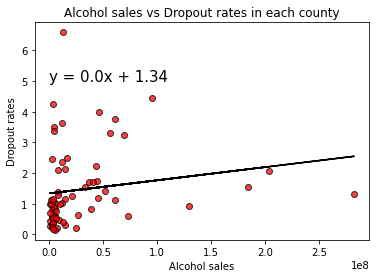

In [240]:
x = combined_df['2019-2020 Year Total ($)']
y = combined_df['Dropout Rate']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.plot(x,regress_values,"k-")
plt.annotate(line_eq,(2.0,5),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

plt.title("Alcohol sales vs Dropout rates in each county")
plt.xlabel("Alcohol sales")
plt.ylabel("Dropout rates")
plt.savefig("Visualizations/sales_v_dropoutrates.png")

In [26]:
#compare average and rate

The r-squared is: 0.028374550970866087


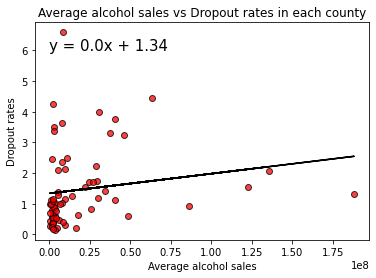

In [239]:
x = combined_df['Average ($)']
y = combined_df['Dropout Rate']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.plot(x,regress_values,"k-")
plt.annotate(line_eq,(2.0,6),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

plt.title("Average alcohol sales vs Dropout rates in each county")
plt.xlabel("Average alcohol sales")
plt.ylabel("Dropout rates")
plt.savefig("Visualizations/avgsales_v_dropoutrates.png")

In [28]:
#compare sales and dropouts

The r-squared is: 0.40401610050935194


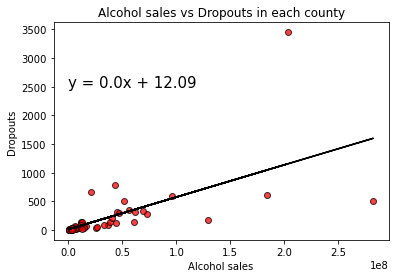

In [238]:
#limitation: alcohol sales 2019-2020 starts in july and ends in june. However, dropouts start in the month of October and end in June.
x = combined_df['2019-2020 Year Total ($)']
y = combined_df['Dropouts']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.plot(x,regress_values,"k-")
plt.annotate(line_eq,(2.0,2500),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")


plt.title("Alcohol sales vs Dropouts in each county")
plt.xlabel("Alcohol sales")
plt.ylabel("Dropouts")
plt.savefig("Visualizations/sales_v_dropouts.png")

# H0: Alcohol sales have no effect on high-school dropouts
# Ha: Alcohol sales have an effect on high-school dropouts

In [112]:
#sales
data1 = combined_df['2019-2020 Year Total ($)']
#dropouts
data2 = combined_df['Dropouts']

In [68]:
import numpy as np
import scipy.stats as stats

In [116]:
stats.ttest_ind(data1, data2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=4.701018588488568, pvalue=1.3622512702960749e-05)

In [115]:
#since pvalue < 0.025, you can infer that the null hypothesis is false and should be rejected. Therefore, alcohol sales have an effect on high-school dropouts.